<a href="https://colab.research.google.com/github/Minupama/PatternRecognition_Assignment/blob/main/%20EN3150_ModelForFungi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Access the defungi dataset on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the OS module
import os

# Import utilities convert an image into a NumPy array and get an image.
from tensorflow.keras.preprocessing.image import img_to_array, load_img

defungi_path = '/content/drive/MyDrive/defungi'

In [ ]:
#Indicate the subfolders within 'defungi'.
subfolders = ['H1', 'H2', 'H3', 'H5', 'H6']

#Print each subfolder's file list.
for folder in subfolders:
    folder_path = os.path.join(defungi_path, folder)
    print(f"Files in {folder}:")
    print(os.listdir(folder_path))
    print("\n")

Files in H1:
['H1_76c_24.jpg', 'H1_76d_7.jpg', 'H1_76d_6.jpg', 'H1_76c_6.jpg', 'H1_76c_3.jpg', 'H1_76c_21.jpg', 'H1_76e_9.jpg', 'H1_76e_5.jpg', 'H1_77a_18.jpg', 'H1_77a_5.jpg', 'H1_77a_12.jpg', 'H1_77a_2.jpg', 'H1_77a_13.jpg', 'H1_77a_25.jpg', 'H1_77a_23.jpg', 'H1_76e_4.jpg', 'H1_77a_14.jpg', 'H1_76e_7.jpg', 'H1_76e_2.jpg', 'H1_77a_15.jpg', 'H1_77a_19.jpg', 'H1_76e_11.jpg', 'H1_77a_22.jpg', 'H1_77a_1.jpg', 'H1_77a_8.jpg', 'H1_76e_15.jpg', 'H1_76e_13.jpg', 'H1_77a_7.jpg', 'H1_77a_4.jpg', 'H1_77a_21.jpg', 'H1_77a_20.jpg', 'H1_76e_6.jpg', 'H1_77a_17.jpg', 'H1_77a_16.jpg', 'H1_77a_10.jpg', 'H1_77a_11.jpg', 'H1_77a_6.jpg', 'H1_76e_8.jpg', 'H1_76e_3.jpg', 'H1_76e_12.jpg', 'H1_76e_14.jpg', 'H1_77a_3.jpg', 'H1_77a_24.jpg', 'H1_77b_11.jpg', 'H1_77b_7.jpg', 'H1_77b_15.jpg', 'H1_77b_14.jpg', 'H1_77a_9.jpg', 'H1_77b_1.jpg', 'H1_78a_4.jpg', 'H1_77b_5.jpg', 'H1_78a_6.jpg', 'H1_77b_2.jpg', 'H1_78b_15.jpg', 'H1_78a_7.jpg', 'H1_78b_12.jpg', 'H1_77b_10.jpg', 'H1_77b_13.jpg', 'H1_78b_11.jpg', 'H1_78a_3.j

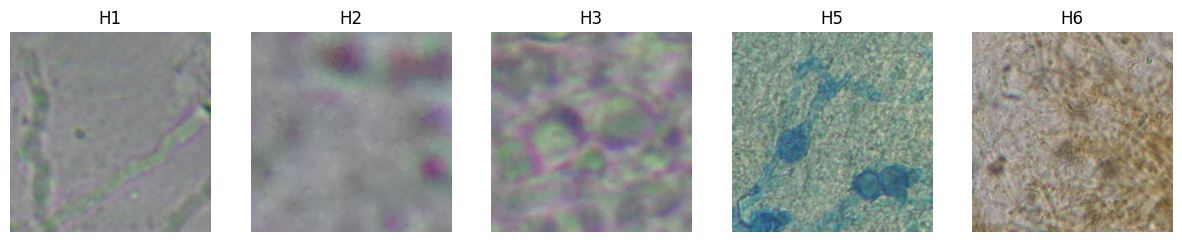

In [ ]:
#import the liabraries
import matplotlib.pyplot as  plt
import matplotlib.image as mpimg
import random

# Set the size of the figures for the whole plot
plt.figure(figsize=(15, 10))

#Loop through each subdirectory and show one image.
for i, folder in enumerate(subfolders):
    # Construct the full path to the current subfolder
    folder_path = os.path.join(defungi_path, folder)

    # Randomly select an image file from the current subfolder
    image_file = random.choice(os.listdir(folder_path))

    # Construct the full path to the selected image
    image_path = os.path.join(folder_path, image_file)
    img = mpimg.imread(image_path)

    #plot the image
    plt.subplot(1, len(subfolders), i + 1)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')

plt.show()


In [ ]:
# specify the path to the dataset
dataset_path = '/content/drive/MyDrive/defungi'

subfolders = ['H1', 'H2', 'H3', 'H5', 'H6']

In [ ]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import random

# Initialise lists to store picture data and labels
data = []
labels = []

# Path to the dataset folder
dataset_path = '/content/drive/MyDrive/defungi'



In [ ]:
# Load images and labels
for label, folder in enumerate(subfolders):  # assigning an index to each folder
    folder_path = os.path.join(dataset_path, folder)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            # Load image and resized and converted in to array
            img = load_img(file_path, target_size=(128, 128))
            img_array = img_to_array(img)
            # Append the data of the image
            data.append(img_array)
            # Append the labe
            labels.append(label)    l
        except Exception as e:
            print(f"Could not load image {file_path}: {e}")


In [ ]:
# To convert into numpy array
data = np.array(data)
labels = np.array(labels)

# Organise labels and data into a list
dataset = list(zip(data, labels))

# Shuffle the dataset
random.shuffle(dataset)

# Separate the shuffled dataset into data and labels again
data, labels = zip(*dataset)  #

# Convert into NumPy arrays
data = np.array(data)
labels = np.array(labels)

#print the total number of images and lables
print(f"Total images: {len(data)}, Total labels: {len(labels)}")

Total images: 8950, Total labels: 8950


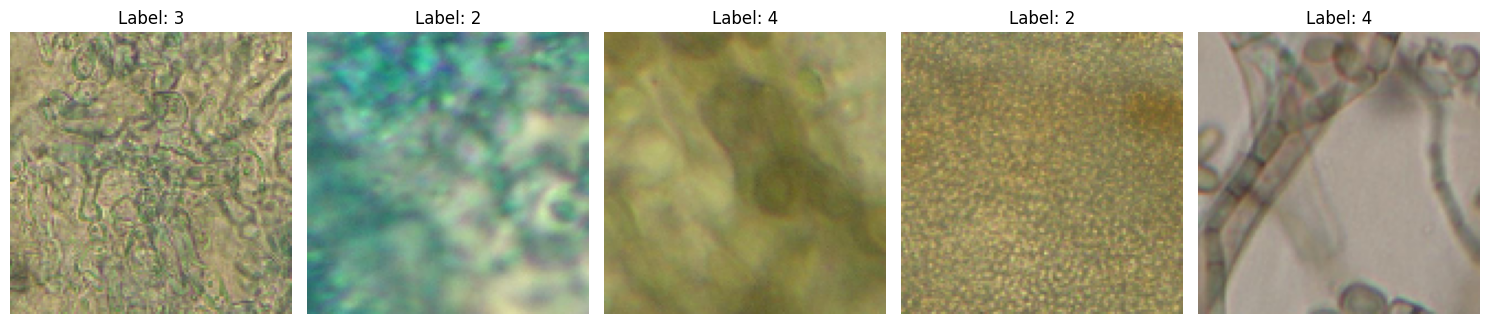

In [ ]:
import matplotlib.pyplot as plt
import random

# choose 5 indices randomly
random_indices = random.sample(range(len(data)), 5)

# Plot the chosen pictures and the labels
plt.figure(figsize=(15, 10))

for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data[idx].astype("uint8"))
    plt.title(f"Label: {labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Import the necessary library for splitting datasets
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training data (60%) and temporary data (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.4, random_state=42)

# Split the temporary set into validation data (50%) and testing data (50%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Normalize the images by dividing by 255.0 to scale pixel values to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


# Print the sizes of the splits
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 5370
Validation set size: 1790
Testing set size: 1790


In [ ]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augmented data generator for training dataset.
augmented_data_generator = data_augmentation.flow(
    X_train / 255.0,  # Normalize training images
    y_train,
    batch_size=32
)

In [ ]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

# Function to build a CNN model
def build_cnn(input_shape, num_classes):
    model = models.Sequential()

    # First convolutional layer: 32 filters, 3x3 kernel, ReLU activation, L2 regularization
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))  # Max Pooling

   # Second convolutional layer: 64 filters, 3x3 kernel
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))  # Max Pooling

    # Third convolutional layer: 128 filters, for deeper feature extraction
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))  # Max Pooling

    # Fourth convolutional layer: 256 filters, deeper and more complex features
    model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())

    # Fully connected (dense) layer
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

    # Dropout to reduce overfitting
    model.add(layers.Dropout(0.3))

    # Output layer with softmax activation for multi-class classification
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Example usage: Specify input shape and number of classes
input_shape = (128, 128, 3)  # input shape (height, width, channels)
num_classes = 5  # The number of classes in the output layer depends on the number of folders.

# Create the model
model = build_cnn(input_shape, num_classes)

# Compile the model using the updated learning rate.
optimizer = Adam(learning_rate=0.1)  # Lower learning rate
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 9216)                │          36,864 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,616,069 (6.16 MB)

 Trainable params: 1,596,421 (6.09 MB)

 Non-trainable params: 19,648 (76.75 KB)

In [ ]:
# Example training
history = model.fit(
    X_train,
    y_train,
    epochs=20,  # Number of epochs
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 31s 104ms/step - accuracy: 0.4551 - loss: 81.8609 - val_accuracy: 0.4961 - val_loss: 1.5855
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4811 - loss: 1.4138 - val_accuracy: 0.4961 - val_loss: 1.3181
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.4893 - loss: 1.3154 - val_accuracy: 0.4961 - val_loss: 1.3128
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.4976 - loss: 1.3030 - val_accuracy: 0.4961 - val_loss: 1.3111
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5024 - loss: 1.3030 - val_accuracy: 0.4961 - val_loss: 1.3143
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5108 - loss: 1.2949 - val_accuracy: 0.4961 - val_loss: 1.3106
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.4974 - loss: 1.3039 - val_accuracy: 0.4961 - val_loss: 1.3239
Epoch 8/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4915 - loss: 1.3079 - val_a

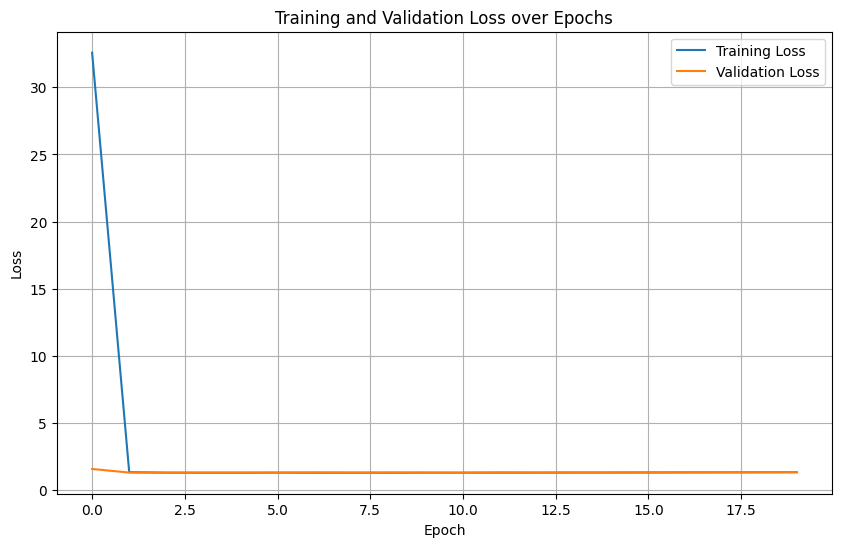

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4842 - loss: 1.3908
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Test Accuracy: 0.4922
Confusion Matrix:
[[881   0   0   0   0]
 [435   0   0   0   0]
 [132   0   0   0   0]
 [179   0   0   0   0]
 [163   0   0   0   0]]

Precision for each class: [0.49217877 0.         0.         0.         0.        ]
Recall for each class: [1. 0. 0. 0. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


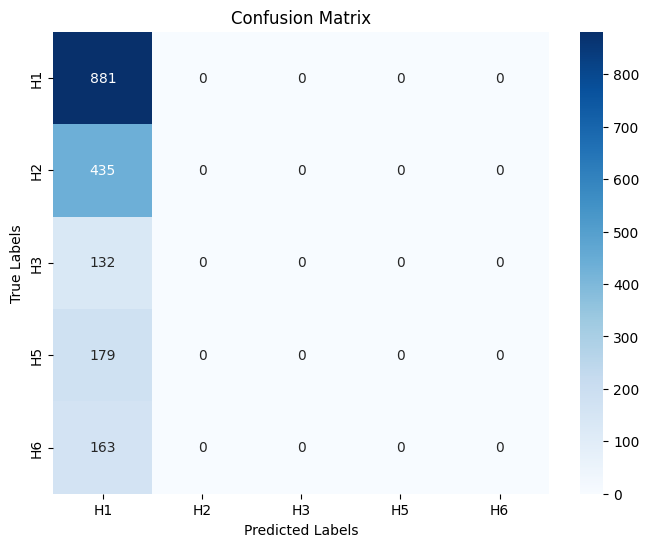

168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4911 - loss: 1.3698
Train Accuracy: 0.4948


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Evaluate the model using the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Make predictions for the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions into class labels
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision and recall for each class
precision = precision_score(y_test, y_pred, average=None)  # Per class
recall = recall_score(y_test, y_pred, average=None)  # Per class

# Print evaluation metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision for each class:", precision)
print("Recall for each class:", recall)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=subfolders, yticklabels=subfolders)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# To see the overall accuracy (train/test)
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Accuracy: {train_accuracy:.4f}")
